In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


In [2]:
#loading dataset
df = pd.read_csv("C:\\Users\\spred\\OneDrive\\Documents\\WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
#check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [12]:
#remove not used column
df.drop('Id',axis=1,inplace=True)

In [15]:
# Convert numerical quality into categorical labels
df['quality_category'] = pd.cut(
    df['quality'],
    bins=[0, 4, 6, 10],
    labels=['Low', 'Medium', 'High']
)

print(df[['quality', 'quality_category']])

      quality quality_category
0           5           Medium
1           5           Medium
2           5           Medium
3           6           Medium
4           5           Medium
...       ...              ...
1138        6           Medium
1139        6           Medium
1140        5           Medium
1141        6           Medium
1142        5           Medium

[1143 rows x 2 columns]


In [16]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Medium
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,Medium
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,High
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,High
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,Medium


In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_category'],
      dtype='object')

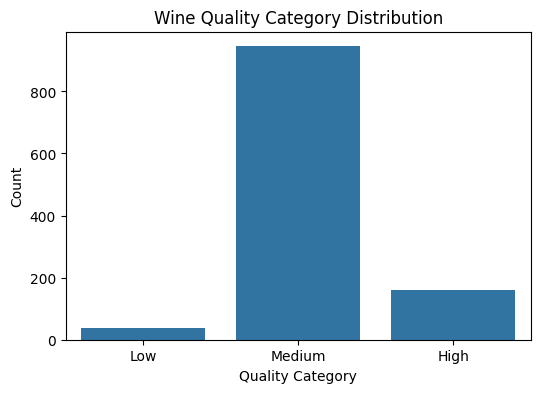

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='quality_category', data=df)
plt.title("Wine Quality Category Distribution")
plt.xlabel("Quality Category")
plt.ylabel("Count")
plt.show()

Insights
* 0-4 quality is low quality wine
* 4-6 quality is medium quality wine
* 6-10 quality is higt quality wine

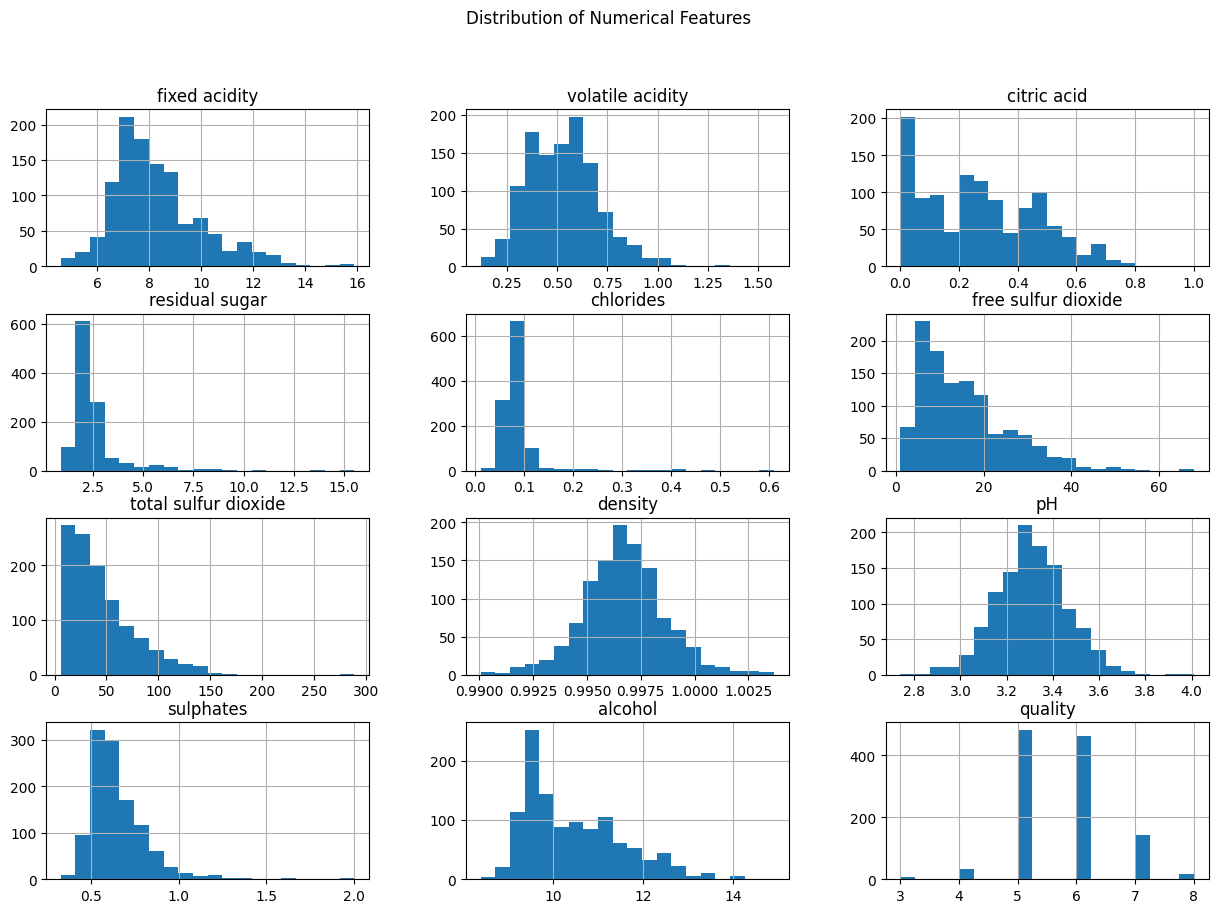

In [19]:
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

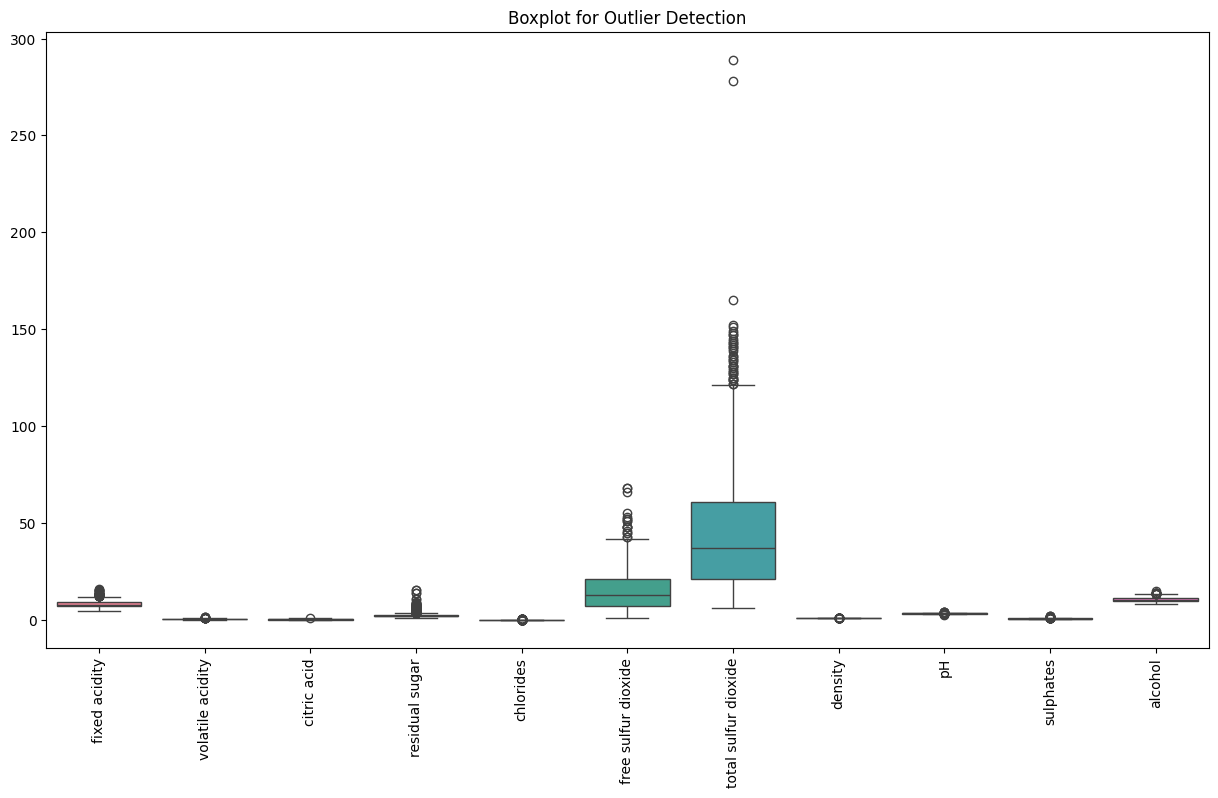

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df.drop(['quality', 'quality_category'], axis=1))
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

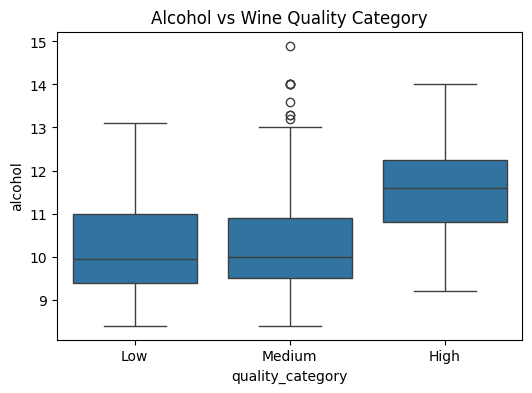

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x='quality_category', y='alcohol', data=df)
plt.title("Alcohol vs Wine Quality Category")
plt.show()

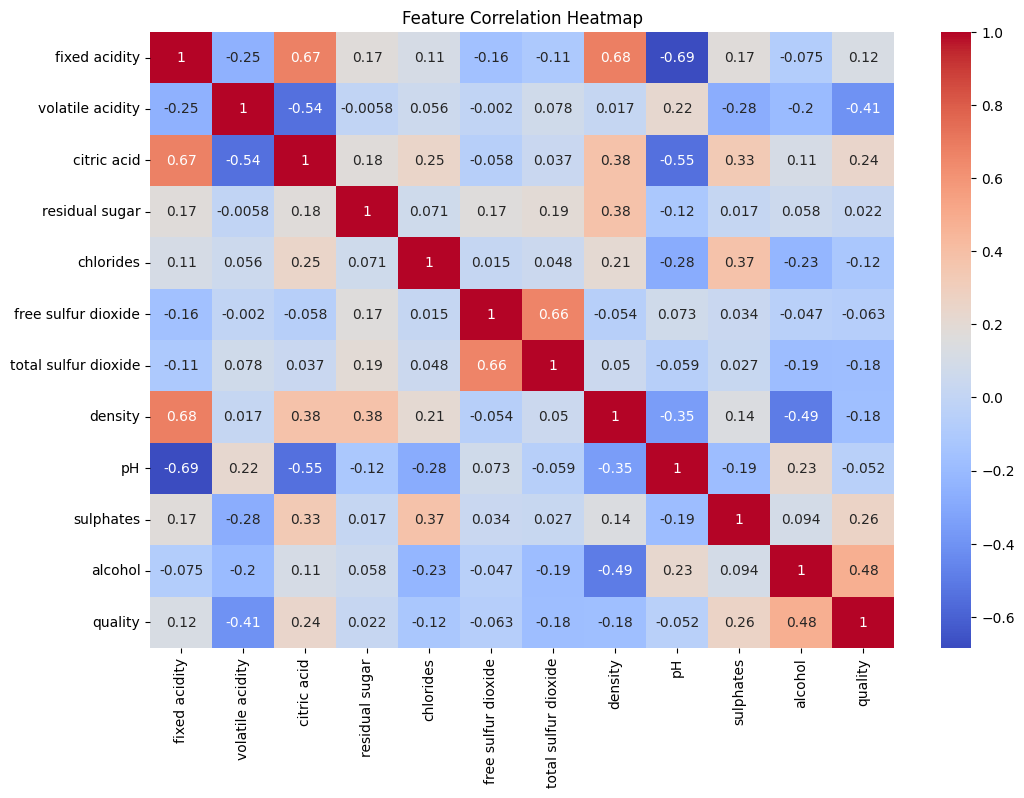

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

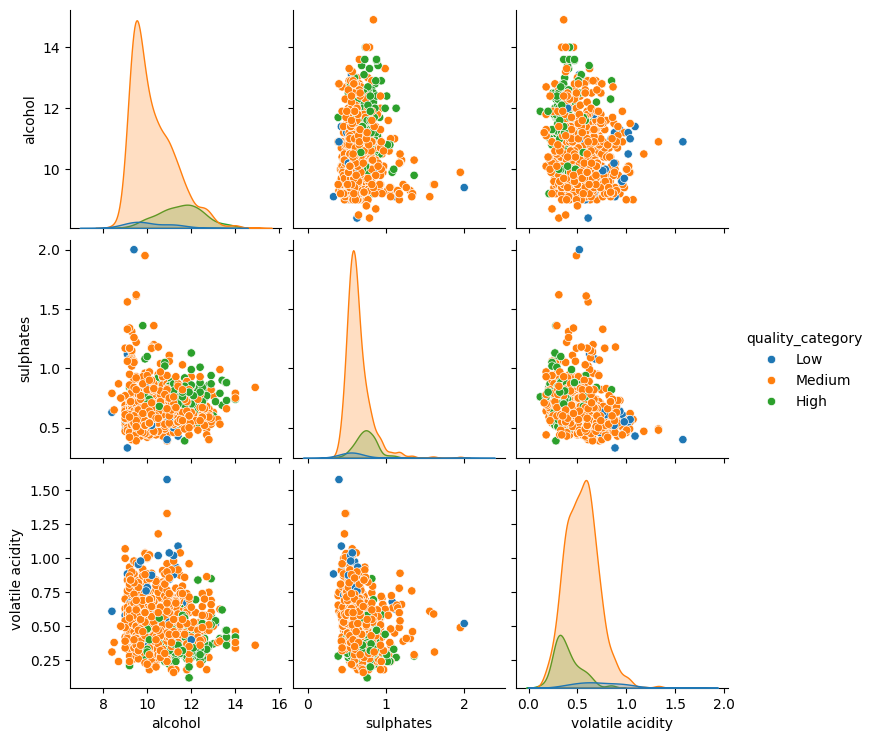

In [23]:
sns.pairplot(
    df,
    hue='quality_category',
    vars=['alcohol', 'sulphates', 'volatile acidity']
)
plt.show()

In [25]:
#outlayer treatment
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']:
    df = remove_outliers(df, col)

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['quality_encoded'] = le.fit_transform(df['quality_category'])

print(le.classes_)

['High' 'Low' 'Medium']


In [27]:
#feature and target selection
X = df.drop(['quality', 'quality_category', 'quality_encoded'], axis=1)
y = df['quality_encoded']

In [28]:
#train,test & split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
#feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
#model Training
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [31]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [33]:
#SVC
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [34]:
#model evaluation
from sklearn.metrics import classification_report, accuracy_score

print("RF Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

print("GB Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

RF Accuracy: 0.8846153846153846
              precision    recall  f1-score   support

           0       0.80      0.50      0.62        24
           1       0.00      0.00      0.00         6
           2       0.89      0.98      0.93       152

    accuracy                           0.88       182
   macro avg       0.56      0.49      0.52       182
weighted avg       0.85      0.88      0.86       182

GB Accuracy: 0.8681318681318682
              precision    recall  f1-score   support

           0       0.65      0.54      0.59        24
           1       0.50      0.17      0.25         6
           2       0.90      0.95      0.92       152

    accuracy                           0.87       182
   macro avg       0.68      0.55      0.59       182
weighted avg       0.85      0.87      0.86       182

SVM Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.75      0.25      0.38        24
           1       0.00      0.0

C:\Users\spred\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\spred\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\spred\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\spred\anaconda3\Lib\site-packag

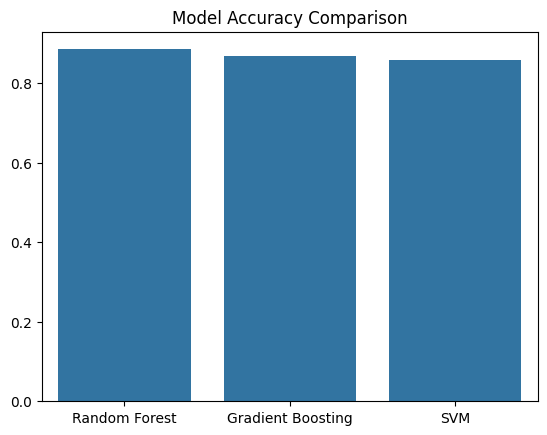

In [35]:
#accuracy comparision
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Random Forest', 'Gradient Boosting', 'SVM']
accuracy = [
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, gb_pred),
    accuracy_score(y_test, svm_pred)
]

sns.barplot(x=models, y=accuracy)
plt.title("Model Accuracy Comparison")
plt.show()

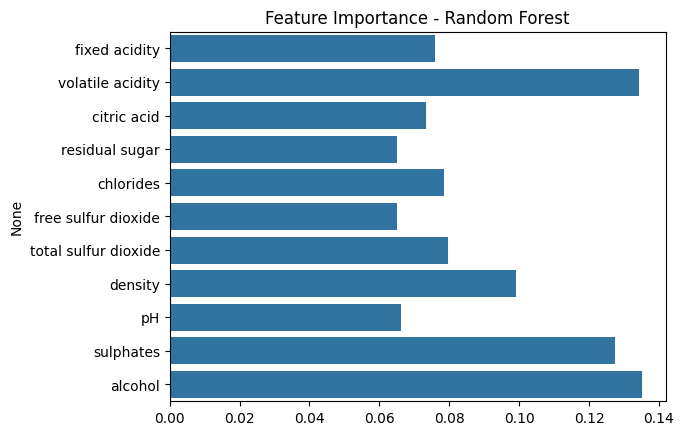

In [36]:
#feature importance
importances = rf.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()

insights
*fetures like valatile acidity,sulphates,alcohal are important in predicting wine quality
*Random forest model gives us more accuracy